# Libraries

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import re
import nltk
import pandas as pd

# Data

You can upload the scrapped company filings to your github repo, for this demo, we will read in the one I uploaded for 5 companies in the Energy Sector. There are three filings for each company for years 2018, 2019, and 2020.

In [ ]:
%%capture
!wget https://raw.githubusercontent.com/huiyinz/CourseProject/main/ProcessedFiles/Filings.csv

In [ ]:
path = "Filings.csv" # EDIT THIS WITH THE FILE YOU UPLOAD
df = pd.read_csv(path)  
df.head()

,Unnamed: 0,Company,Dates,Filings
0,0,CVX-CHEVRON-CORP,20191231,Item 1A. Risk Factors Chevron is a global ener...
1,1,CVX-CHEVRON-CORP,20181231,Item 1A. Risk Factors Chevron is a global ener...
2,2,CVX-CHEVRON-CORP,20211231,Item 1A. Risk Factors As a global energy compa...
3,3,CVX-CHEVRON-CORP,20171231,Item 1A. Risk Factors Chevron is a global ener...
4,4,CVX-CHEVRON-CORP,20201231,Item 1A. Risk Factors Chevron is a global ener...


In [ ]:
nltk.download('vader_lexicon')
SIA = SentimentIntensityAnalyzer()

scores = list(df.apply(lambda row : SIA.polarity_scores(row['Filings']), axis = 1))
sentiment_df = pd.concat([df, pd.DataFrame(scores)], axis=1)

plot_df = pd.melt(sentiment_df, id_vars=["Company", "Dates", "Filings"], value_vars=["neg", "neu", "pos", "compound"])
plot_df['Dates'] = pd.to_datetime(plot_df['Dates'], format='%Y%m%d', errors='ignore')
plot_df['Years'] = pd.DatetimeIndex(plot_df['Dates']).year
plot_df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Company,Dates,Filings,variable,value,Years
0,CVX-CHEVRON-CORP,2019-12-31,Item 1A. Risk Factors Chevron is a global ener...,neg,0.108,2019
1,CVX-CHEVRON-CORP,2018-12-31,Item 1A. Risk Factors Chevron is a global ener...,neg,0.111,2018
2,CVX-CHEVRON-CORP,2021-12-31,Item 1A. Risk Factors As a global energy compa...,neg,0.086,2021
3,CVX-CHEVRON-CORP,2017-12-31,Item 1A. Risk Factors Chevron is a global ener...,neg,0.110,2017
4,CVX-CHEVRON-CORP,2020-12-31,Item 1A. Risk Factors Chevron is a global ener...,neg,0.078,2020


# Visualize!

/usr/local/lib/python3.8/dist-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
/usr/local/lib/python3.8/dist-packages/plotnine/facets/facet.py:396: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


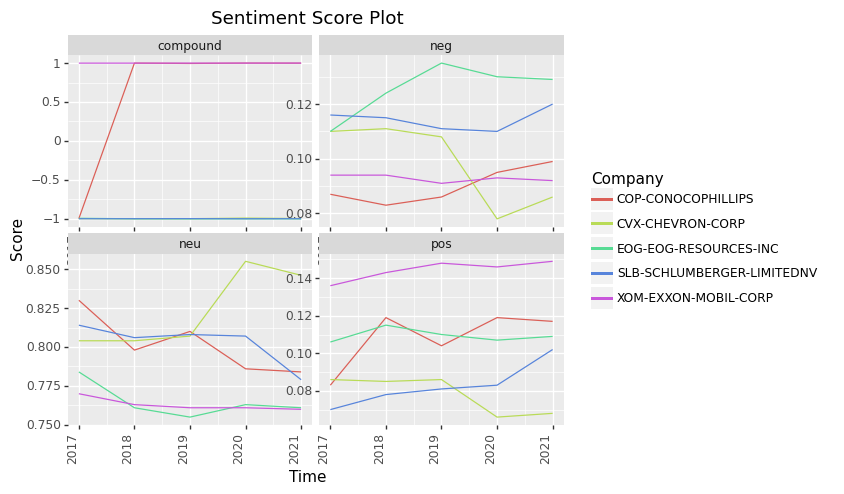

<ggplot: (8775811841046)>

In [ ]:
from plotnine import *

(
    ggplot(plot_df)
    + facet_wrap(facets="~variable", scales="free")
    + aes(x="Years", y="value", color="Company")
    + labs(
        x="Time",
        y="Score",
        title="Sentiment Score Plot",
    )
    + geom_line()
    + theme(
        axis_text_x  = element_text(angle = 90, hjust = 1)
    )
)